In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [484]:
data = pd.read_csv("housing_prices.csv")
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,0.0,Shoreline,USA
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,280.0,Seattle,USA
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,0.0,Kent,USA
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,1000.0,Bellevue,USA
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,800.0,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,1510.0,0.0,Seattle,USA
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,1460.0,0.0,Bellevue,USA
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,3010.0,0.0,Renton,USA
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1070.0,1020.0,Seattle,USA


In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4599 non-null   float64
 1   bedrooms       4599 non-null   float64
 2   bathrooms      4594 non-null   float64
 3   sqft_living    4566 non-null   float64
 4   floors         4589 non-null   float64
 5   waterfront     4587 non-null   float64
 6   view           4594 non-null   float64
 7   sqft_above     4593 non-null   float64
 8   sqft_basement  4598 non-null   float64
 9   city           4600 non-null   object 
 10  country        4600 non-null   object 
dtypes: float64(9), object(2)
memory usage: 395.4+ KB


In [487]:
data.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living      34
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [488]:
data["sqft_living"].fillna(np.mean(data["sqft_living"]),inplace=True)
data.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living       0
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [489]:
data.dropna(inplace=True)
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
city             0
country          0
dtype: int64

In [490]:
X = data.drop(["price", "city", "country"], axis= 1)
y = data["price"]
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.20128051729201257

In [491]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.554000e+03,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000
mean,5.527701e+05,3.402723,2.162934,2141.938922,1.513395,0.007246,0.239789,1829.556653,312.464866
std,5.660575e+05,0.909646,0.784553,963.232210,0.537458,0.084826,0.778041,864.090756,464.583498
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.238750e+05,3.000000,1.750000,1470.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.620000e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2617.500000,2.000000,0.000000,0.000000,2302.250000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


<Axes: xlabel='price', ylabel='Count'>

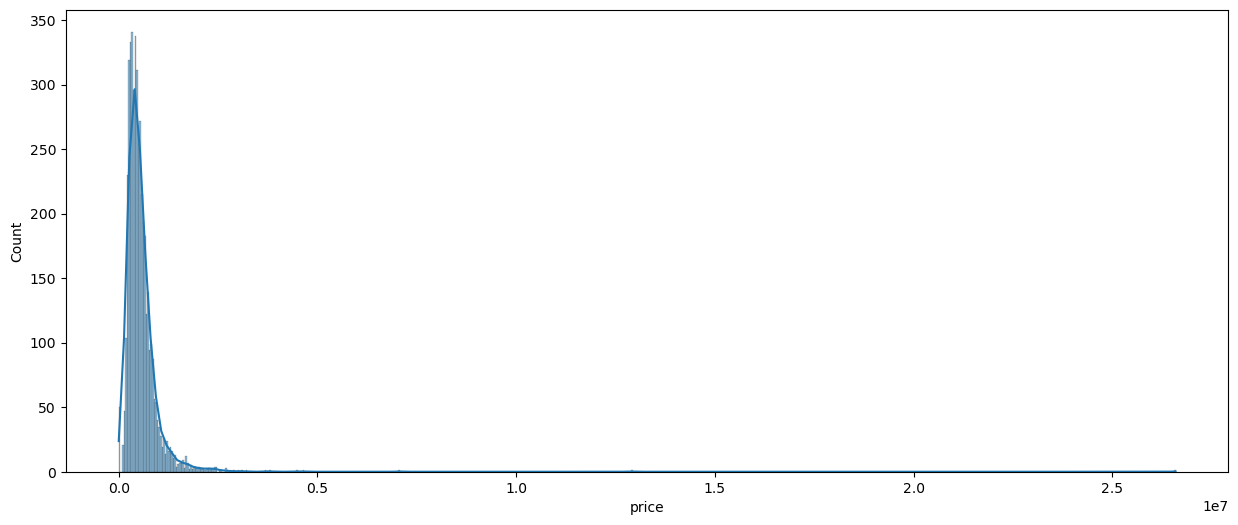

In [492]:
plt.figure(figsize=((15,6)))
sns.histplot(data["price"],kde=True)

<Axes: xlabel='price', ylabel='Count'>

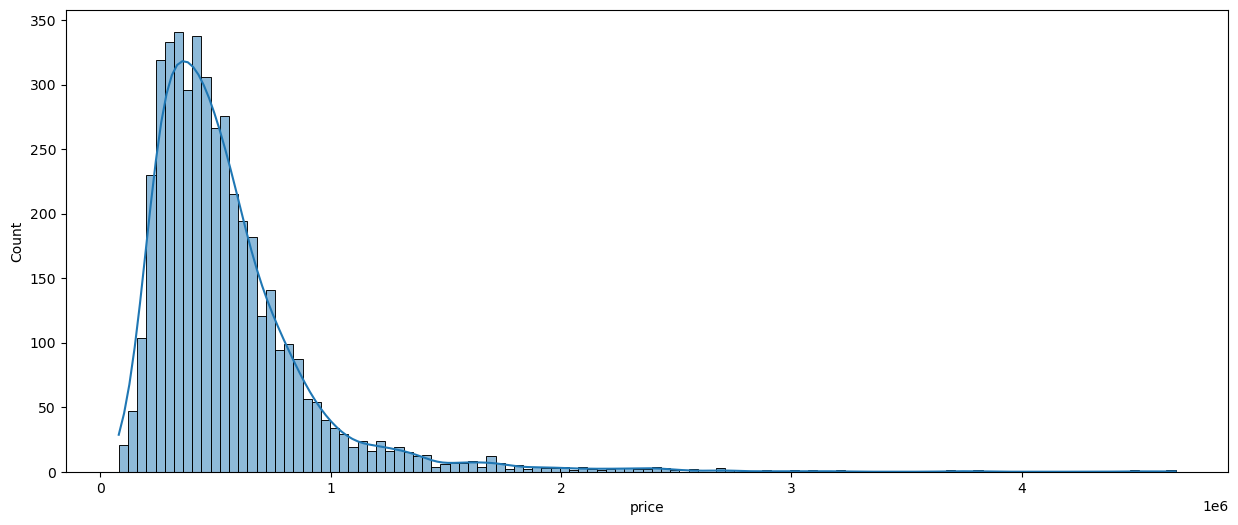

In [493]:
data = data[data["price"] < .5 * 1e7]
data = data[data["price"] > 40000]
plt.figure(figsize=((15,6)))
sns.histplot(data["price"],kde=True)

In [494]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.501000e+03,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,5.489349e+05,3.396579,2.156798,2133.665819,1.513775,0.006443,0.233504,1823.621640,310.127749
std,3.561518e+05,0.905184,0.776427,948.733835,0.537721,0.080018,0.764720,852.063147,461.543285
min,8.000000e+04,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.265000e+05,3.000000,1.750000,1470.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.580000e+05,4.000000,2.500000,2610.000000,2.000000,0.000000,0.000000,2300.000000,600.000000
max,4.668000e+06,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


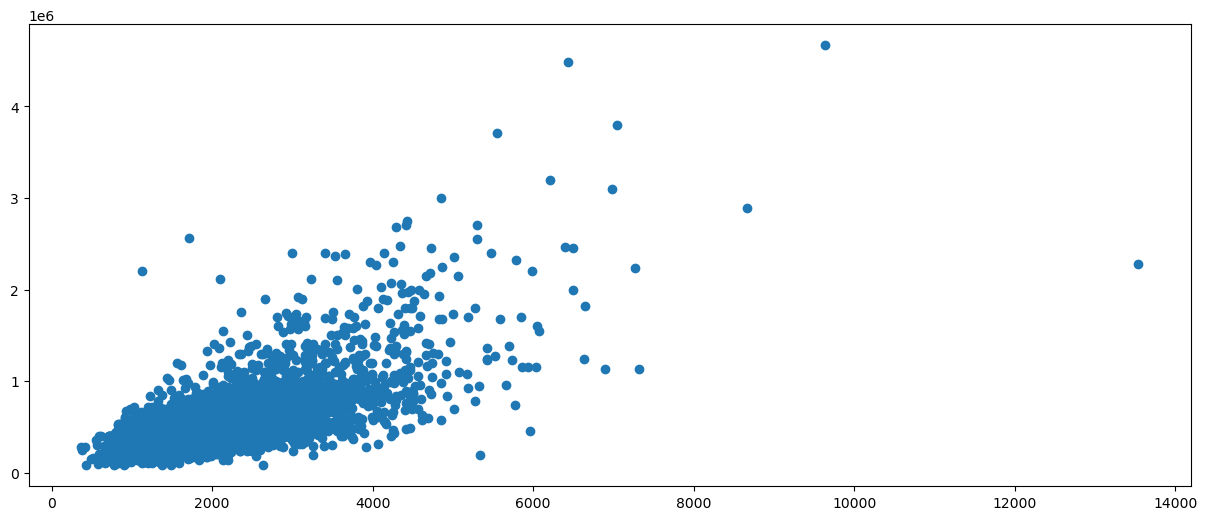

In [495]:
plt.figure(figsize=((15,6)))
plt.scatter(x = data["sqft_living"], y = data["price"])

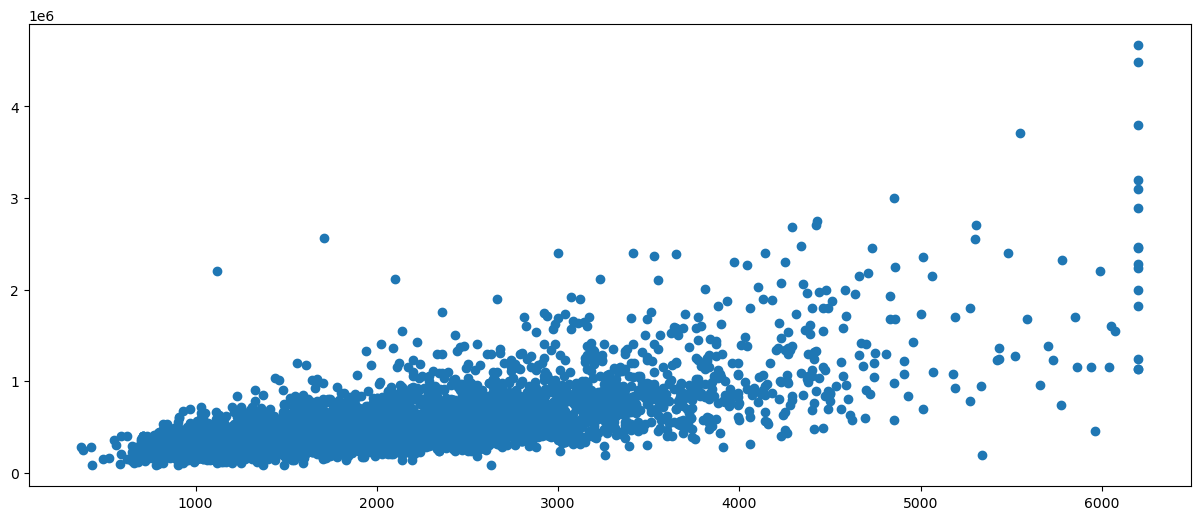

In [496]:
data["sqft_living"] = np.where(data["sqft_living"] < 6200, data["sqft_living"],6200)
plt.figure(figsize=((15,6)))
plt.scatter(x = data["sqft_living"], y = data["price"])

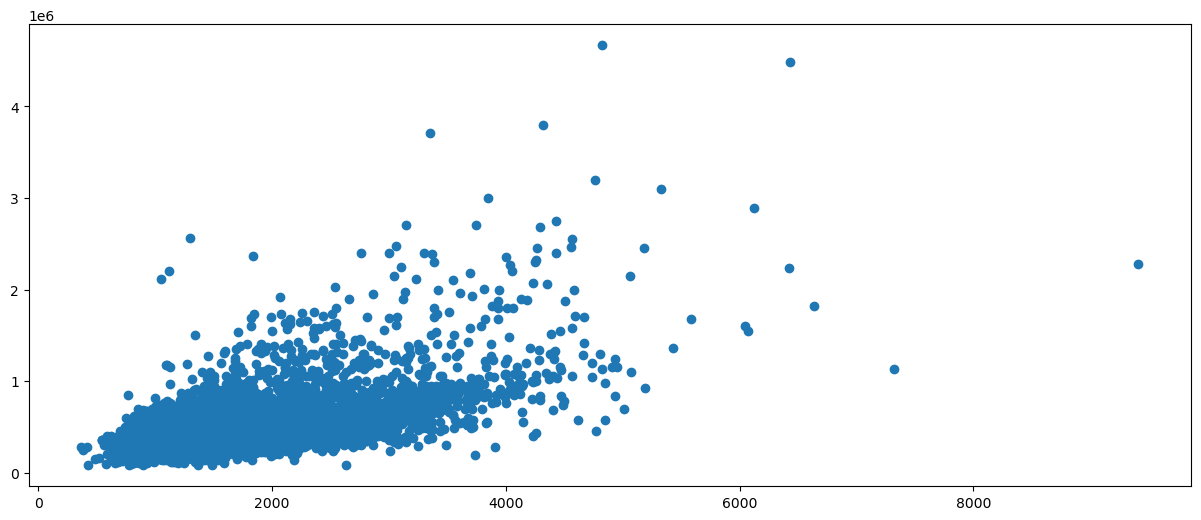

In [497]:
plt.figure(figsize=((15,6)))
plt.scatter(x = data["sqft_above"], y = data["price"])

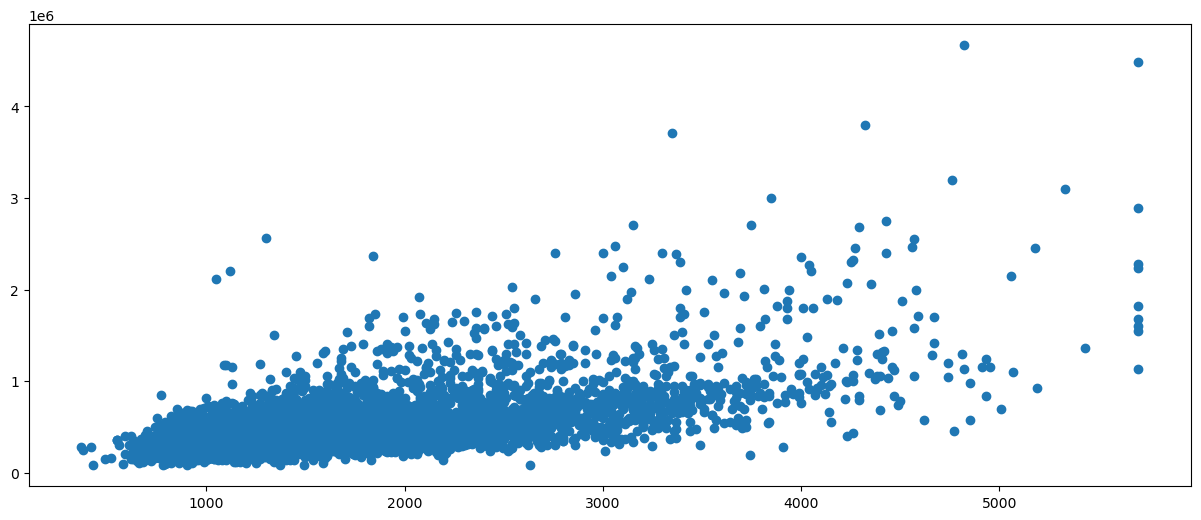

In [498]:
data["sqft_above"] = np.where(data["sqft_above"] < 5500, data["sqft_above"],5700)
plt.figure(figsize=((15,6)))
plt.scatter(x = data["sqft_above"], y = data["price"])

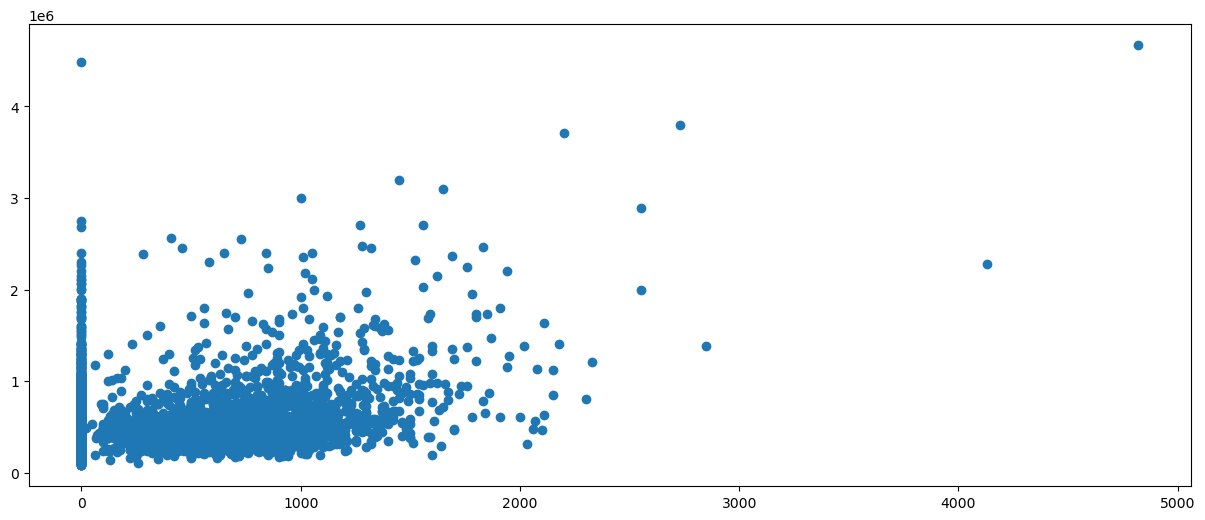

In [499]:
plt.figure(figsize=((15,6)))
plt.scatter(x = data["sqft_basement"], y = data["price"])

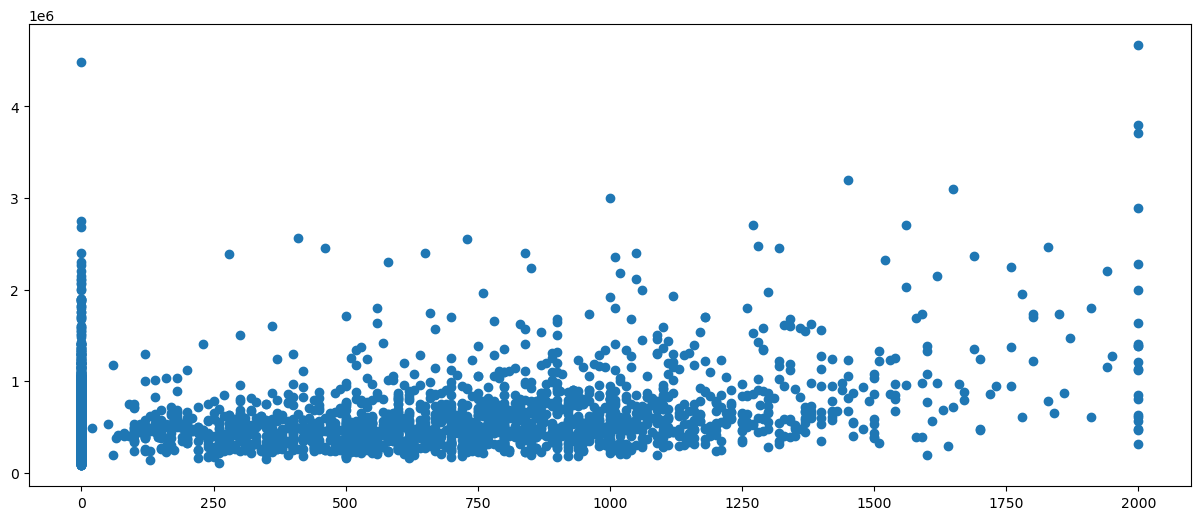

In [500]:
data["sqft_basement"] = np.where(data["sqft_basement"] < 2000, data["sqft_basement"],2000)
plt.figure(figsize=((15,6)))
plt.scatter(x = data["sqft_basement"], y = data["price"])

<Axes: xlabel='bedrooms', ylabel='price'>

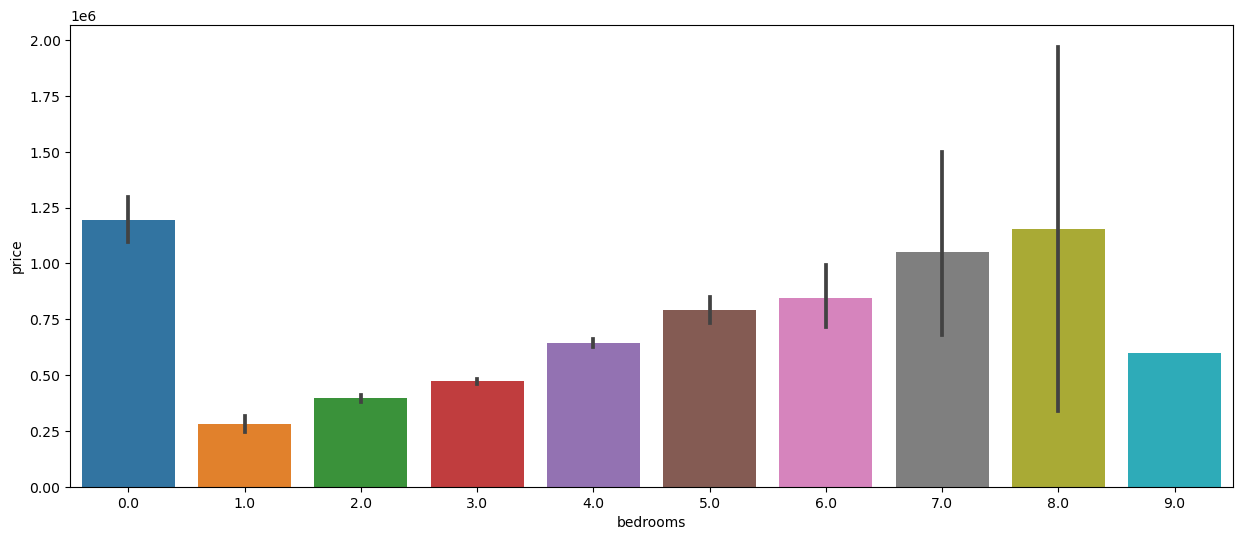

In [501]:
plt.figure(figsize=((15,6)))
sns.barplot(x = data["bedrooms"], y = data["price"])

In [502]:
data = data[data["bathrooms"]!=0]
data = data[data["bedrooms"] != 0]

<Axes: xlabel='bedrooms', ylabel='price'>

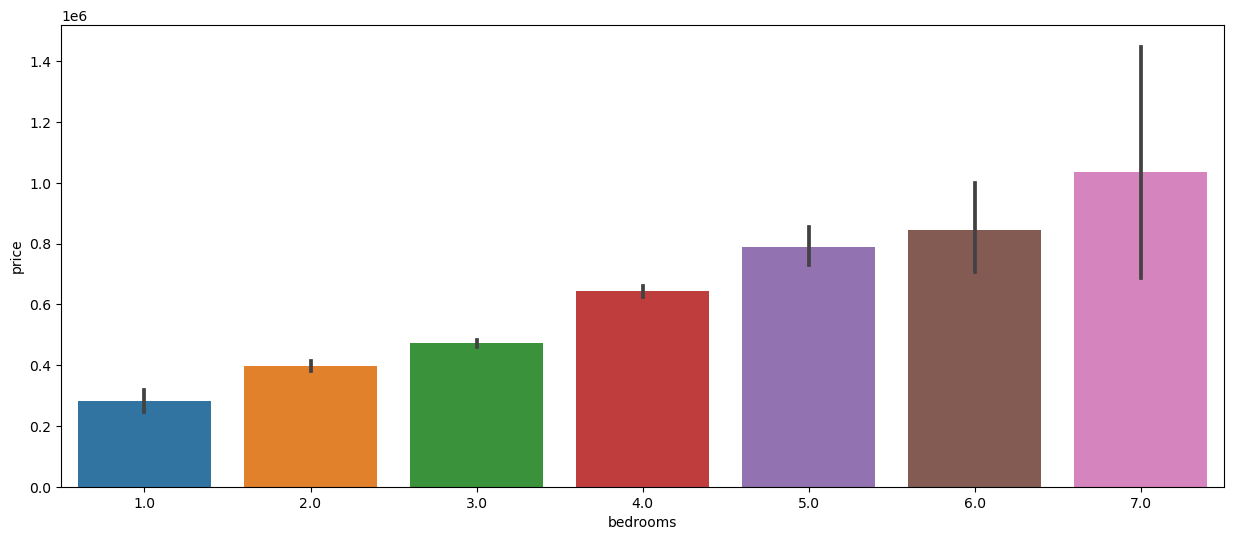

In [503]:
data["bedrooms"] = np.where(data["bedrooms"] < 7, data["bedrooms"],7)
plt.figure(figsize=((15,6)))
sns.barplot(x = data["bedrooms"], y = data["price"])

<Axes: xlabel='bathrooms', ylabel='price'>

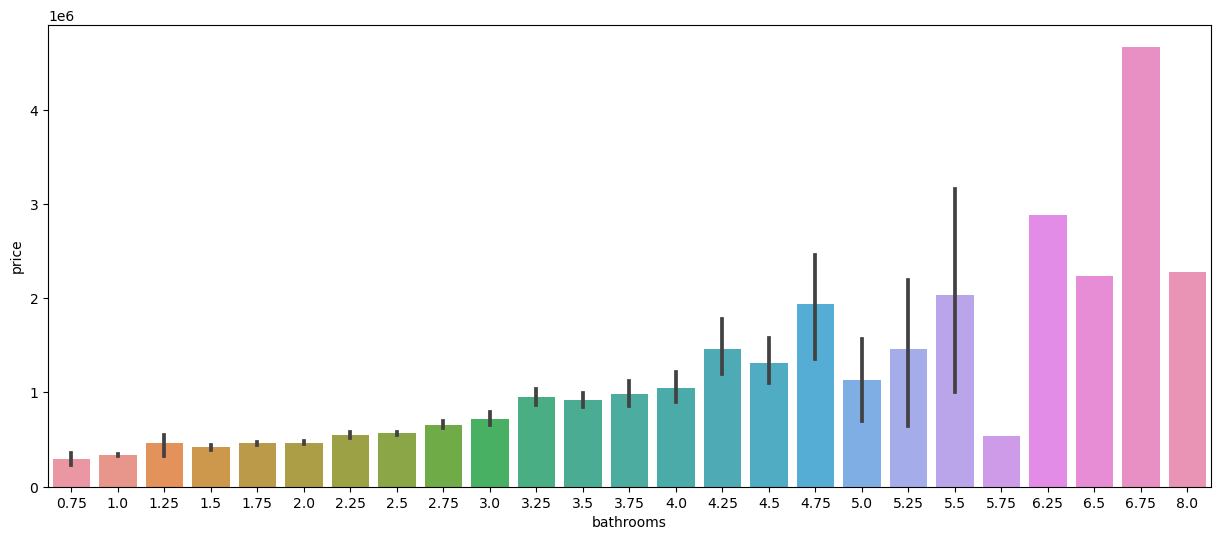

In [504]:
plt.figure(figsize=((15,6)))
sns.barplot(x = data["bathrooms"], y = data["price"])

<Axes: xlabel='bathrooms', ylabel='price'>

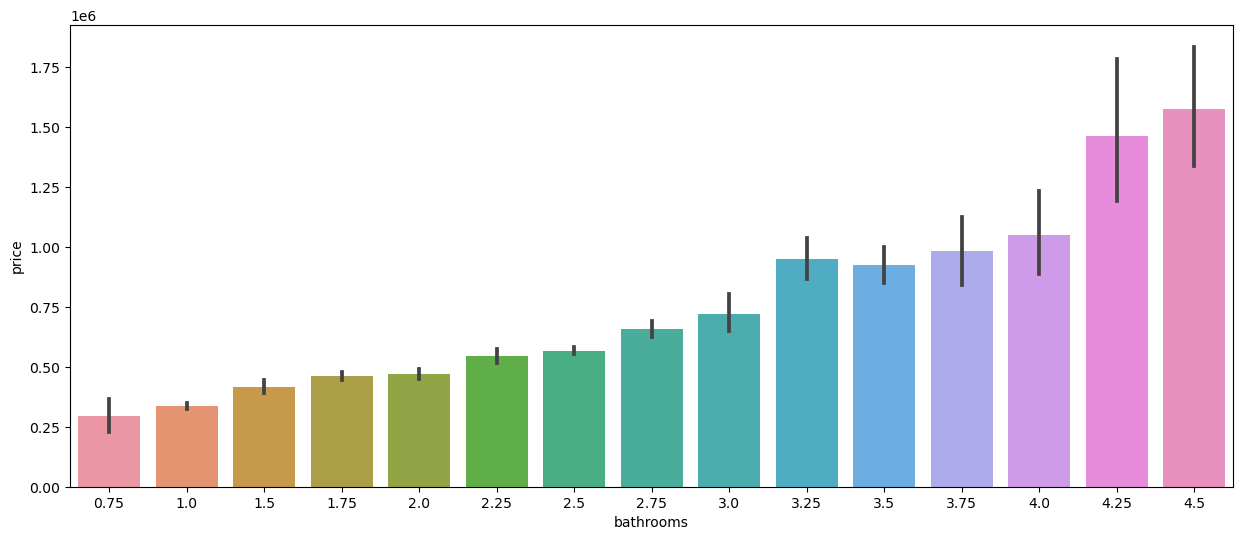

In [505]:
data["bathrooms"] = np.where(data["bathrooms"] < 4.5, data["bathrooms"],4.5)
data["bathrooms"] = np.where(data["bathrooms"] == 1.25, 1,data["bathrooms"])
plt.figure(figsize=((15,6)))
sns.barplot(x = data["bathrooms"], y = data["price"])

In [506]:
data["bathrooms"].value_counts().sort_index()

bathrooms
0.75      17
1.00     728
1.50     283
1.75     619
2.00     422
2.25     407
2.50    1173
2.75     269
3.00     162
3.25     134
3.50     158
3.75      34
4.00      21
4.25      22
4.50      50
Name: count, dtype: int64

<Axes: xlabel='floors', ylabel='price'>

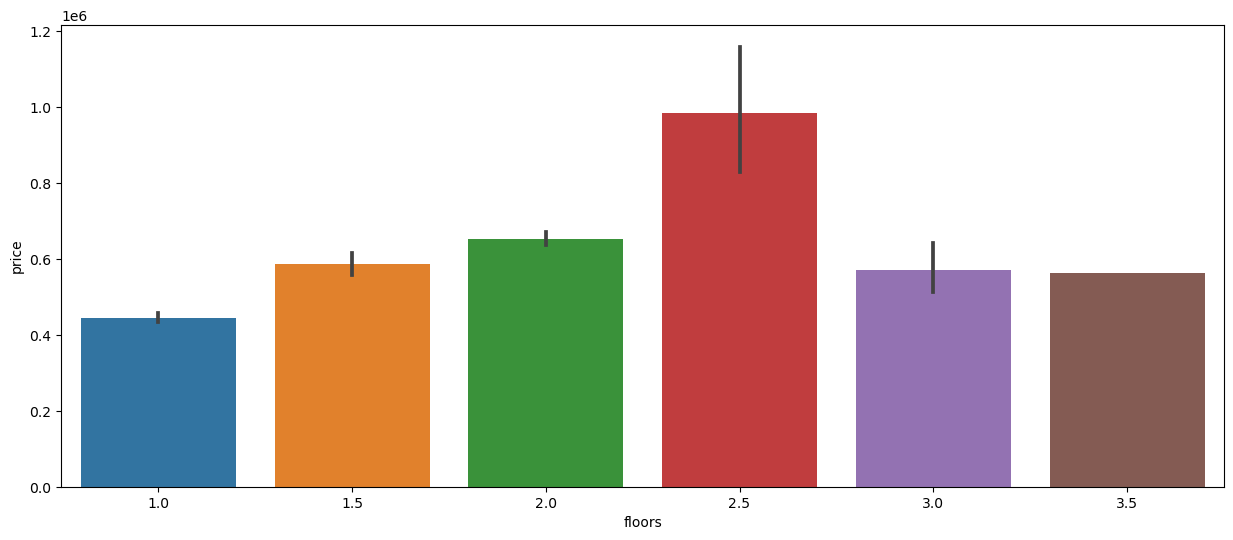

In [507]:
plt.figure(figsize=((15,6)))
sns.barplot(x = data["floors"], y = data["price"])

In [508]:
data["floors"].value_counts().sort_index()

floors
1.0    2117
1.5     438
2.0    1778
2.5      41
3.0     124
3.5       1
Name: count, dtype: int64

<Axes: xlabel='floors', ylabel='price'>

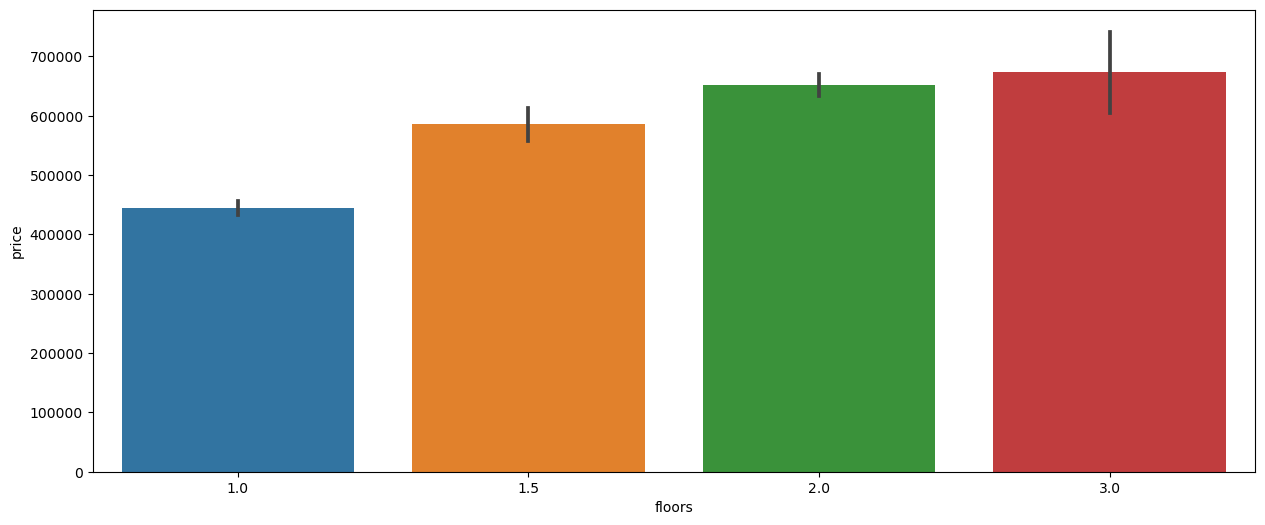

In [509]:
data["floors"] = np.where(data["floors"] == 3.5 , 3.0, data["floors"])
data["floors"] = np.where(data["floors"] == 2.5 , 3.0, data["floors"])
plt.figure(figsize=((15,6)))
sns.barplot(x = data["floors"], y = data["price"])

<Axes: xlabel='view', ylabel='price'>

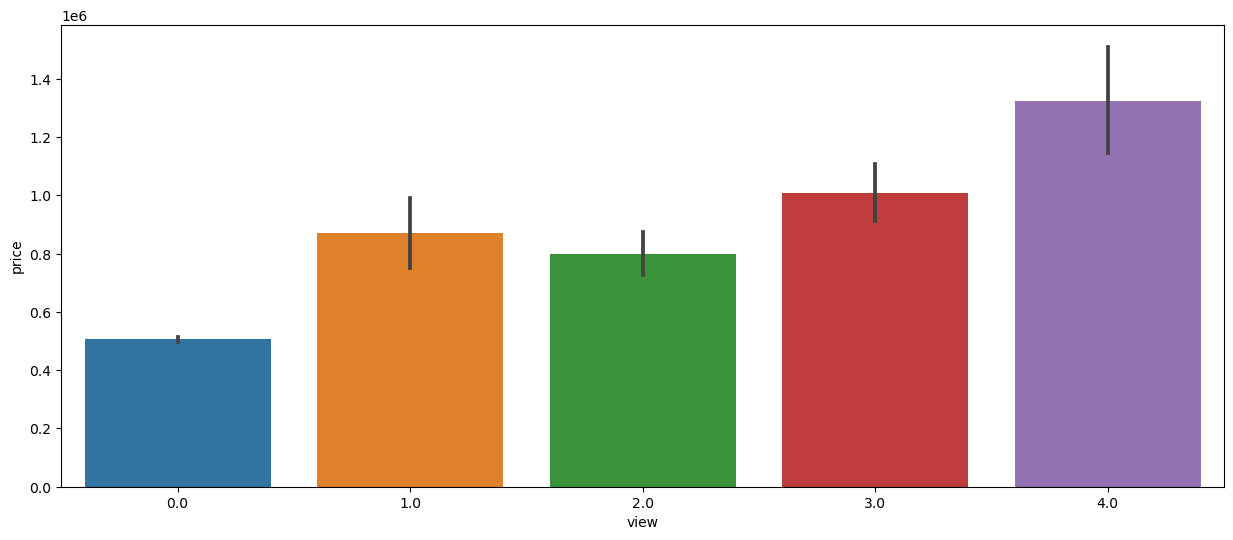

In [510]:
plt.figure(figsize=((15,6)))
sns.barplot(x = data["view"], y = data["price"])

In [511]:
data["view"].value_counts().sort_index()

view
0.0    4060
1.0      68
2.0     195
3.0     113
4.0      63
Name: count, dtype: int64

<Axes: xlabel='view', ylabel='price'>

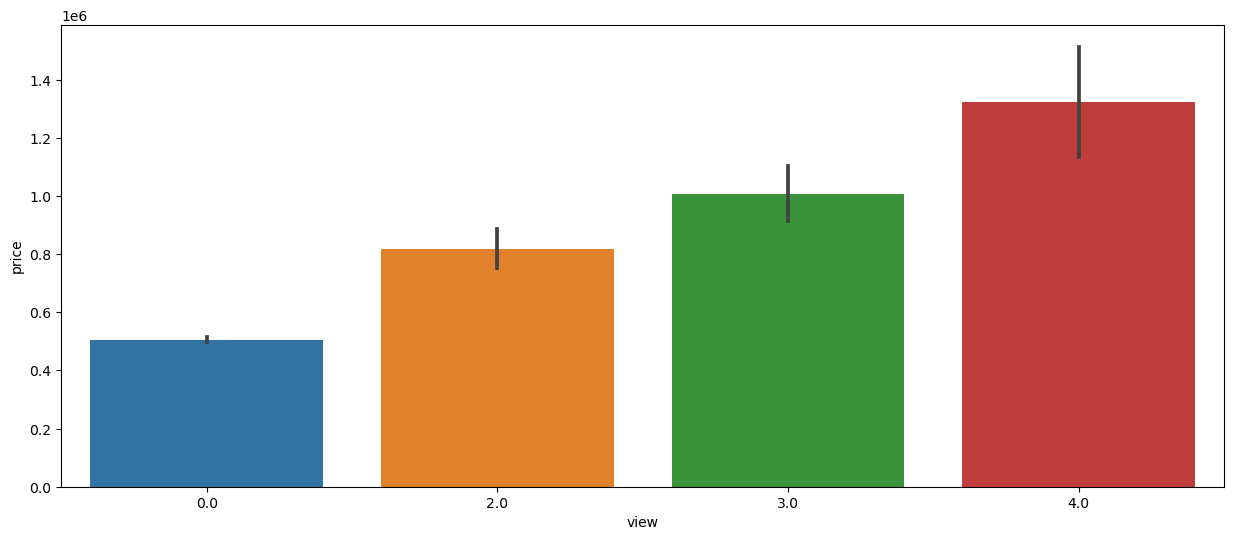

In [512]:
data["view"] = np.where(data["view"] == 1.0, 2.0, data["view"])
plt.figure(figsize=((15,6)))
sns.barplot(x = data["view"], y = data["price"])

<Axes: xlabel='waterfront', ylabel='price'>

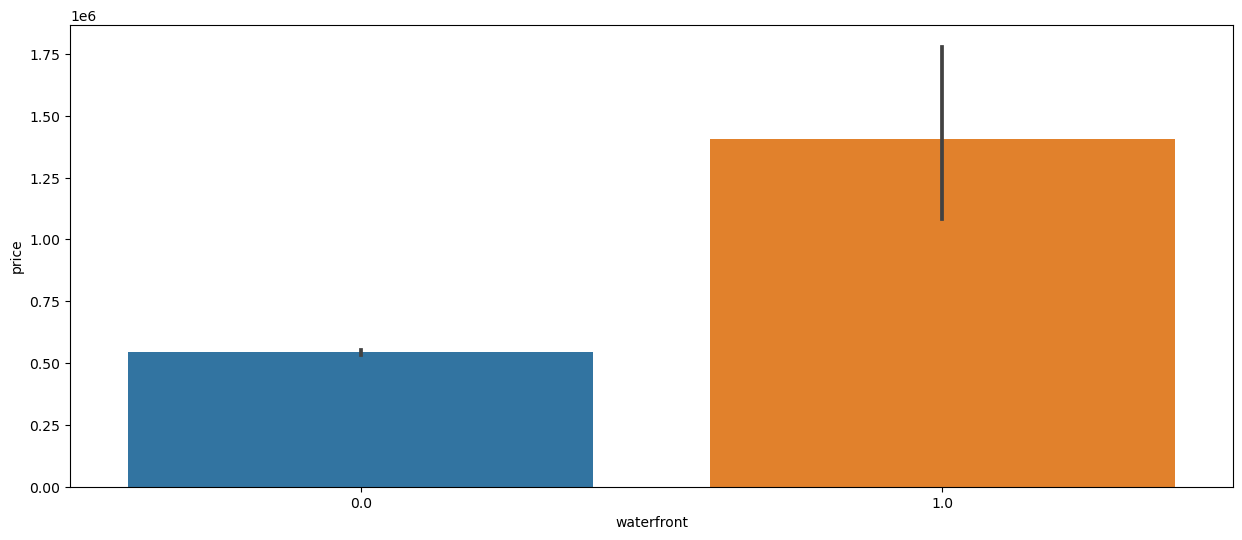

In [513]:
plt.figure(figsize=((15,6)))
sns.barplot(x = data["waterfront"], y = data["price"])

In [514]:
X = data.drop(["price", "city", "country"], axis= 1)
y = data["price"]
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.5249360271505703

In [515]:
data.describe(include="object")

,city,country
count,4499,4499
unique,44,1
top,Seattle,USA
freq,1541,4499


In [518]:
X = data.drop(["price"],axis=1)
X = pd.get_dummies(data= X, columns=["city","country"])
y = data["price"]

In [517]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.6939173195711565